In [ ]:
from google.colab import drive
import matplotlib.pyplot as plt

## Mount your Google Drive

In [ ]:
drive.mount('/content/gdrive')

In [ ]:
!ls /content/gdrive/My\ Drive/

ls: cannot access '/content/gdrive/My Drive/': No such file or directory


# Load the Attainment Data

In [ ]:
import pandas as pd
import glob, os

data_dir= '/content/gdrive/My Drive/SY2020 Winter Break ADF Projects/'
filename = 'Assessment_NWEA_SchoolLevel_2019.xlsx'
os.chdir(data_dir)

df=pd.read_excel(filename, sheet_name='Attainment', skiprows=1)

print("Column headings:")
print(df.columns)


Column headings:
Index(['School ID', 'School Name', 'Network', 'Subject', 'Grade',
       ' # Students', 'Average RIT Score',
       ' % At/Above National Average Performance',
       'National School Attainment Percentile', ' # Students.1',
       'Average RIT Score.1', ' % At/Above National Average Performance.1',
       'National School Attainment Percentile.1', ' # Students.2',
       'Average RIT Score.2', ' % At/Above National Average Performance.2',
       'National School Attainment Percentile.2', ' # Students.3',
       'Average RIT Score.3', ' % At/Above National Average Performance.3',
       'National School Attainment Percentile.3', ' # Students.4',
       'Average RIT Score.4', ' % At/Above National Average Performance.4',
       'National School Attainment Percentile.4', ' # Students.5',
       'Average RIT Score.5', ' % At/Above National Average Performance.5',
       'National School Attainment Percentile.5', ' # Students.6',
       'Average RIT Score.6', ' % At/Above 

In [ ]:
print("Loaded data has shape {}".format(df.shape))

Loaded data has shape (8653, 33)


In [ ]:
df.head()

,School ID,School Name,Network,Subject,Grade,# Students,Average RIT Score,% At/Above National Average Performance,National School Attainment Percentile,# Students.1,Average RIT Score.1,% At/Above National Average Performance.1,National School Attainment Percentile.1,# Students.2,Average RIT Score.2,% At/Above National Average Performance.2,National School Attainment Percentile.2,# Students.3,Average RIT Score.3,% At/Above National Average Performance.3,National School Attainment Percentile.3,# Students.4,Average RIT Score.4,% At/Above National Average Performance.4,National School Attainment Percentile.4,# Students.5,Average RIT Score.5,% At/Above National Average Performance.5,National School Attainment Percentile.5,# Students.6,Average RIT Score.6,% At/Above National Average Performance.6,National School Attainment Percentile.6
0,400009,GLOBAL CITIZENSHIP,Charter,READING,Grade 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.0,194.1,72.7,90.0,40.0,190.0,62.5,58.0,34.0,180.3,32.4,11.0,29.0,186.2,48.3,36.0,41.0,181.5,24.4,14.0
1,400009,GLOBAL CITIZENSHIP,Charter,READING,Grade 3,NaN,NaN,NaN,NaN,45.0,195.7,44.4,35.0,44.0,198.0,50.0,51.0,43.0,195.3,34.9,31.0,40.0,206.3,82.5,88.0,40.0,197.8,55.0,45.0,34.0,201.9,67.6,69.0
2,400009,GLOBAL CITIZENSHIP,Charter,READING,Grade 4,NaN,NaN,NaN,NaN,48.0,201.0,37.5,25.0,46.0,206.5,45.7,64.0,47.0,203.2,44.7,34.0,49.0,207.3,55.1,59.0,42.0,208.4,54.8,65.0,49.0,199.6,38.8,17.0
3,400009,GLOBAL CITIZENSHIP,Charter,READING,Grade 5,NaN,NaN,NaN,NaN,48.0,201.3,27.1,5.0,47.0,211.0,44.7,49.0,46.0,210.7,47.8,43.0,47.0,212.1,48.9,52.0,46.0,212.7,56.5,56.0,46.0,211.4,47.8,47.0
4,400009,GLOBAL CITIZENSHIP,Charter,READING,Grade 6,NaN,NaN,NaN,NaN,49.0,212.9,42.9,31.0,48.0,216.0,54.2,53.0,49.0,218.0,59.2,63.0,43.0,219.0,55.8,69.0,46.0,219.5,65.2,72.0,45.0,218.8,66.7,68.0


In [ ]:
#Filter the grade level with only aggregated rows
df = df[(df.Grade == 'Grades 2-8 Combined') | (df.Grade == 'Grades 3-8 Combined')]

In [ ]:
print("Loaded data has shape {}".format(df.shape))

Loaded data has shape (2056, 33)


# Slice & Concate

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
Years = ['SY2013','SY2014','SY2015','SY2016','SY2017','SY2018','SY2019']

In [ ]:
dfs = []
for i in range(len(Years)):
    x = i*4 + 5 
    new = df.iloc[:, np.r_[0:5, x:x+4]]
    new = new.dropna(thresh=9)
    
    new.head()
    # After renaming the columns 
    new.columns =['ZonedID', 'SchoolName', 'Network', 'Subject', 'Grade','Students','AverageRIT', 'PercentAchieving', 'AchievementPercentile']
    new['AcademicYear'] = Years[i]
    dfs.append(new)

# Concatenate all data into one DataFrame
attainment = pd.concat(dfs, ignore_index=True)

In [ ]:
#Divide by 100  so that it shows as a decimal
attainment.PercentAchieving = attainment.PercentAchieving/100

In [ ]:
attainment.tail()

,ZonedID,SchoolName,Network,Subject,Grade,Students,AverageRIT,PercentAchieving,AchievementPercentile,AcademicYear
9798,610588,RICHARDSON,Network 10,MATH,Grades 2-8 Combined,964.0,227.5,0.531,55.0,SY2019
9799,610589,SOR JUANA,Network 8,READING,Grades 2-8 Combined,29.0,194.7,0.724,81.0,SY2019
9800,610589,SOR JUANA,Network 8,MATH,Grades 2-8 Combined,29.0,200.7,0.793,91.0,SY2019
9801,610590,BRONZEVILLE CLASSICAL,Network 9,READING,Grades 2-8 Combined,37.0,206.7,0.973,99.0,SY2019
9802,610590,BRONZEVILLE CLASSICAL,Network 9,MATH,Grades 2-8 Combined,37.0,211.3,0.973,99.0,SY2019


In [ ]:
# Lets look at some stats shall we?
display(attainment.describe())
display(attainment.describe(include=['O']))

,ZonedID,Students,AverageRIT,PercentAchieving,AchievementPercentile
count,9803.000000,9803.000000,9803.000000,9803.000000,9803.000000
mean,583266.517801,336.077425,213.559849,0.518562,48.949199
std,70068.975144,177.934671,9.378332,0.185900,30.164817
min,400009.000000,14.000000,173.200000,0.000000,1.000000
25%,609845.000000,209.000000,207.400000,0.384000,23.000000
50%,610012.000000,298.000000,213.000000,0.507000,48.000000
75%,610176.000000,420.000000,219.000000,0.643000,75.000000
max,610590.000000,1228.000000,273.900000,1.000000,99.000000


,SchoolName,Network,Subject,Grade,AcademicYear
count,9803,9803,9803,9803,9803
unique,514,21,2,2,7
top,DISNEY II ES,ISP,READING,Grades 2-8 Combined,SY2015
freq,40,1438,4902,6894,2002


In [ ]:
#export to csv
attainment.to_csv( "/content/gdrive/My Drive/SY2020 Winter Break ADF Projects/attainment.csv", index=False, encoding='utf-8-sig')

# Load the Growth Data


In [ ]:
df=pd.read_excel(filename, sheet_name='Growth', skiprows=1)

print("Column headings:")
print(df.columns)


Column headings:
Index(['School ID', 'School Name', 'Network', 'Subject', 'Grade', '# Tested',
       'Average Pretest RIT Score', 'Average Posttest RIT Score ',
       'Average RIT Growth', '% Students Making National Average Growth',
       'National School Growth Percentile', '# Tested.1',
       'Average Pretest RIT Score.1', 'Average Posttest RIT Score .1',
       'Average RIT Growth.1', '% Students Making National Average Growth.1',
       'National School Growth Percentile.1', '# Tested.2',
       'Average Pretest RIT Score.2', 'Average Posttest RIT Score .2',
       'Average RIT Growth.2', '% Students Making National Average Growth.2',
       'National School Growth Percentile.2', '# Tested.3',
       'Average Pretest RIT Score.3', 'Average Posttest RIT Score .3',
       'Average RIT Growth.3', '% Students Making National Average Growth.3',
       'National School Growth Percentile.3', '# Tested.4',
       'Average Pretest RIT Score.4', 'Average Posttest RIT Score .4',
       '

In [ ]:
df.Grade.unique()

array(['Grade 3', 'Grade 4', 'Grade 5', 'Grade 6', 'Grade 7', 'Grade 8',
       'Grades 3-8 Combined'], dtype=object)

In [ ]:
print("Loaded data has shape {}".format(df.shape))

Loaded data has shape (6681, 41)


In [ ]:
df.head()

,School ID,School Name,Network,Subject,Grade,# Tested,Average Pretest RIT Score,Average Posttest RIT Score,Average RIT Growth,% Students Making National Average Growth,National School Growth Percentile,# Tested.1,Average Pretest RIT Score.1,Average Posttest RIT Score .1,Average RIT Growth.1,% Students Making National Average Growth.1,National School Growth Percentile.1,# Tested.2,Average Pretest RIT Score.2,Average Posttest RIT Score .2,Average RIT Growth.2,% Students Making National Average Growth.2,National School Growth Percentile.2,# Tested.3,Average Pretest RIT Score.3,Average Posttest RIT Score .3,Average RIT Growth.3,% Students Making National Average Growth.3,National School Growth Percentile.3,# Tested.4,Average Pretest RIT Score.4,Average Posttest RIT Score .4,Average RIT Growth.4,% Students Making National Average Growth.4,National School Growth Percentile.4,# Tested.5,Average Pretest RIT Score.5,Average Posttest RIT Score .5,Average RIT Growth.5,% Students Making National Average Growth.5,National School Growth Percentile.5
0,400009,GLOBAL CITIZENSHIP,Charter,READING,Grade 3,25.0,193.7,199.5,5.8,36.0,2.0,42.0,190.8,198.3,7.5,38.1,7.0,35.0,193.4,196.4,3.0,17.1,1.0,36.0,190.7,207.4,16.7,80.6,99.0,31.0,180.0,198.3,18.3,74.2,99.0,30.0,184.9,202.7,17.8,83.3,99.0
1,400009,GLOBAL CITIZENSHIP,Charter,READING,Grade 4,40.0,198.1,203.1,5.0,37.5,5.0,45.0,196.0,206.5,10.5,57.8,82.0,43.0,199.0,204.7,5.7,46.5,14.0,39.0,195.6,208.8,13.2,76.9,99.0,39.0,205.1,209.7,4.6,43.6,7.0,43.0,197.1,200.5,3.4,30.2,1.0
2,400009,GLOBAL CITIZENSHIP,Charter,READING,Grade 5,45.0,202.4,202.7,0.3,33.3,1.0,46.0,201.4,211.2,9.8,56.5,85.0,44.0,207.4,212.5,5.1,56.8,32.0,45.0,204.2,212.7,8.5,62.2,92.0,45.0,207.9,213.0,5.1,51.1,34.0,42.0,207.5,212.8,5.3,50.0,38.0
3,400009,GLOBAL CITIZENSHIP,Charter,READING,Grade 6,48.0,208.8,213.9,5.1,68.8,48.0,47.0,202.8,215.9,13.1,80.9,99.0,48.0,212.0,218.2,6.2,72.9,83.0,42.0,213.2,219.1,5.9,71.4,81.0,44.0,213.4,219.5,6.1,63.6,84.0,44.0,214.4,218.8,4.4,47.7,59.0
4,400009,GLOBAL CITIZENSHIP,Charter,READING,Grade 7,NaN,NaN,NaN,NaN,NaN,NaN,43.0,213.2,216.1,2.9,46.5,22.0,44.0,214.3,220.4,6.1,56.8,87.0,41.0,217.3,224.1,6.8,73.2,96.0,39.0,217.6,224.7,7.1,69.2,97.0,41.0,218.9,223.8,4.9,73.2,78.0


In [ ]:
#Filter the grade level with only aggregated rows
df = df[df.Grade == 'Grades 3-8 Combined']

In [ ]:
df.shape

(1024, 41)

# Slice & Concate

In [ ]:
dfs = []
for i in range(len(Years)-1):
    x = i*6 + 5 
    new = df.iloc[:, np.r_[0:5, x:x+6]]
    new = new.dropna(thresh=10)
    
    new.head()
    # After renaming the columns 
    new.columns =['ZonedID', 'SchoolName', 'Network', 'Subject', 'Grade','Students','PretestRIT', 'PosttestRIT','RITGrowth','PercentGrowing', 'GrowthPercentile']
    new['AcademicYear'] = Years[i+1]
    dfs.append(new)

# Concatenate all data into one DataFrame
growth = pd.concat(dfs, ignore_index=True)

In [ ]:
#Divide by 100  so that it shows as a decimal
growth.PercentGrowing = growth.PercentGrowing/100

In [ ]:
growth.head()

,ZonedID,SchoolName,Network,Subject,Grade,Students,PretestRIT,PosttestRIT,RITGrowth,PercentGrowing,GrowthPercentile,AcademicYear
0,400009,GLOBAL CITIZENSHIP,Charter,READING,Grades 3-8 Combined,158.0,201.9,205.7,3.8,0.456,2.0,SY2014
1,400009,GLOBAL CITIZENSHIP,Charter,MATH,Grades 3-8 Combined,158.0,205.7,213.1,7.4,0.582,20.0,SY2014
2,400012,AMANDLA,Charter,READING,Grades 3-8 Combined,190.0,207.9,212.9,5.0,0.611,29.0,SY2014
3,400012,AMANDLA,Charter,MATH,Grades 3-8 Combined,183.0,216.7,222.2,5.5,0.607,27.0,SY2014
4,400017,ASPIRA - HAUGAN,Charter,READING,Grades 3-8 Combined,462.0,214.2,218.7,4.5,0.606,50.0,SY2014


In [ ]:
# Lets look at some stats shall we?
display(growth.describe())
display(growth.describe(include=['O']))

,ZonedID,Students,PretestRIT,PosttestRIT,RITGrowth,PercentGrowing,GrowthPercentile
count,5927.000000,5927.000000,5927.000000,5927.000000,5927.000000,5927.000000,5927.000000
mean,581083.610596,288.088746,209.856302,217.510916,7.654513,0.571385,61.018897
std,72433.313163,152.443263,9.106335,8.932853,2.329641,0.097330,25.421841
min,400009.000000,14.000000,171.600000,179.900000,-2.000000,0.118000,1.000000
25%,609836.000000,179.500000,204.000000,211.600000,6.300000,0.511000,43.000000
50%,610009.000000,256.000000,209.300000,216.700000,7.500000,0.579000,66.000000
75%,610174.500000,357.000000,215.000000,222.700000,8.900000,0.636000,82.000000
max,610588.000000,1008.000000,267.700000,274.200000,36.300000,0.957000,99.000000


,SchoolName,Network,Subject,Grade,AcademicYear
count,5927,5927,5927,5927,5927
unique,509,21,2,1,6
top,DISNEY II ES,ISP,READING,Grades 3-8 Combined,SY2015
freq,24,862,2964,5927,998


In [ ]:
#export to csv
growth.to_csv( "/content/gdrive/My Drive/SY2020 Winter Break ADF Projects/growth.csv", index=False, encoding='utf-8-sig')

# Join VCG Weights to "Accountability_SQRP Ratings..." with the yellow fields matching on SchoolID and create field for Weighted Average * Score




In [ ]:
import pandas as pd
import glob, os

data_dir= '/content/gdrive/My Drive/SY2020 Winter Break ADF Projects/'
filename = 'Accountability_SQRPratings_2019-2020_SchoolLevel.xls'
os.chdir(data_dir)

df=pd.read_excel(filename, sheet_name='Elem Schools (grds PreK-8 only)', skiprows=1) #, header=[0,1])

print("Column headings:")
print(df.columns)

Column headings:
Index(['School ID', 'School Name', 'Network ', 'SQRP Points',
       'SY 2019-2020 SQRP Rating', 'SY 2019-2020 Accountability Status',
       'National School Growth Percentile - Reading', 'Unnamed: 7',
       'Unnamed: 8', 'Unnamed: 9', 'National School Growth Percentile - Math',
       'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Percent of Students Meeting/Exceeding National Average Growth Norms',
       'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'African-American Growth Percentile - Reading', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Hispanic Growth Percentile - Reading',
       'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25',
       'English Learner Growth Percentile - Reading', 'Unnamed: 27',
       'Unnamed: 28', 'Unnamed: 29',
       'Diverse Learner Growth Percentile - Reading', 'Unnamed: 31',
       'Unnamed: 32', 'Unnamed: 33',
       'African-American Growth Percentile - Math', 'Unnamed: 35',
       'Unnamed: 36', 'Unnamed: 37', 'His

In [ ]:
new = df[df.columns.drop(list(df.filter(regex='Unnamed')))]

In [ ]:
#Drop the last two columns since they were not asked to keep
new.drop(new.iloc[:, -2:], inplace = True, axis = 1)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
#Drop the first two columns since they were not asked to keep
new.drop(new.iloc[:, 1:3], inplace = True, axis = 1)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
#Drop the two columns since they were not asked to keep
new.drop(new.iloc[:, 2:4], inplace = True, axis = 1)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
new.head()

,School ID,SQRP Points,National School Growth Percentile - Reading,National School Growth Percentile - Math,Percent of Students Meeting/Exceeding National Average Growth Norms,African-American Growth Percentile - Reading,Hispanic Growth Percentile - Reading,English Learner Growth Percentile - Reading,Diverse Learner Growth Percentile - Reading,African-American Growth Percentile - Math,Hispanic Growth Percentile - Math,English Learner Growth Percentile - Math,Diverse Learner Growth Percentile - Math,National School Attainment %ile - Reading (Grades 3-8),National School Attainment %ile - Math (Grades 3-8),National School Attainment %ile - Reading (Grade 2),National School Attainment %ile - Math (Grade 2),Pct of Students Making Sufficent \nAnnual Progress,Average Daily Attendance Rate (Grades K-8)
0,NaN,NaN,NSGPRead,NSGPMath,PercentGrowing,AAGPRead,HGPRead,ELGPRead,DLGPRead,AAGPMath,HGPMath,ELGPMath,DLGPMath,NSAPRead,NSAPMath,NSAP2Read,NSAP2Math,ACCESS,ADA
1,400009.0,3.3,56,42,51.6,NaN,54,36,NaN,NaN,40,10,NaN,61,39,14,9,20.4,95.1
2,400011.0,3.2,64,65,55.3,64,NaN,NaN,NaN,65,NaN,NaN,NaN,72,65,61,62,NaN,94.6
3,400017.0,3.7,50,47,52,NaN,48,36,NaN,NaN,47,25,NaN,51,34,NaN,NaN,47.2,96.4
4,400021.0,3.4,50,58,52.9,46,NaN,NaN,79,58,NaN,NaN,73,50,35,39,46,NaN,95.6


In [ ]:
single = pd.DataFrame(df['Unnamed: 74'])

In [ ]:
single.head()

,Unnamed: 74
0,5E
1,5
2,NaN
3,5
4,4


In [ ]:
keep = pd.concat([new, single.reindex(new.index)], axis=1)

In [ ]:
#Create the names for the columns to keep
name = ['ZonedID', 'SQRP Points'] + list(keep.iloc[0,2:])

In [ ]:
keep.columns = name

In [ ]:
keep.shape

(474, 20)

In [ ]:
keep.head()

,ZonedID,SQRP Points,NSGPRead,NSGPMath,PercentGrowing,AAGPRead,HGPRead,ELGPRead,DLGPRead,AAGPMath,HGPMath,ELGPMath,DLGPMath,NSAPRead,NSAPMath,NSAP2Read,NSAP2Math,ACCESS,ADA,5E
0,NaN,NaN,NSGPRead,NSGPMath,PercentGrowing,AAGPRead,HGPRead,ELGPRead,DLGPRead,AAGPMath,HGPMath,ELGPMath,DLGPMath,NSAPRead,NSAPMath,NSAP2Read,NSAP2Math,ACCESS,ADA,5E
1,400009.0,3.3,56,42,51.6,NaN,54,36,NaN,NaN,40,10,NaN,61,39,14,9,20.4,95.1,5
2,400011.0,3.2,64,65,55.3,64,NaN,NaN,NaN,65,NaN,NaN,NaN,72,65,61,62,NaN,94.6,NaN
3,400017.0,3.7,50,47,52,NaN,48,36,NaN,NaN,47,25,NaN,51,34,NaN,NaN,47.2,96.4,5
4,400021.0,3.4,50,58,52.9,46,NaN,NaN,79,58,NaN,NaN,73,50,35,39,46,NaN,95.6,4


In [ ]:
#Drop the first row
keep = keep[1:]

In [ ]:
DS = [400025, 400027, 400028, 400030]

# Load VGG weights data

In [ ]:
filename = 'VCGWeightsSY2019.csv'
os.chdir(data_dir)

vgg=pd.read_csv(filename)

In [ ]:
vgg.head()

,SchoolID,Campus,ZonedID,Students,Weight,ZonedName
0,400025,Bucktown,609716,8,0.017131,KELVYN PARK HS
1,400025,Bucktown,609789,13,0.027837,BARRY
2,400025,Bucktown,609792,5,0.010707,BATEMAN
3,400025,Bucktown,609798,1,0.002141,BELDING
4,400025,Bucktown,609799,1,0.002141,BELL


In [ ]:
result = pd.merge(vgg, keep, on='ZonedID')

In [ ]:
result.head()

,SchoolID,Campus,ZonedID,Students,Weight,ZonedName,SQRP Points,NSGPRead,NSGPMath,PercentGrowing,AAGPRead,HGPRead,ELGPRead,DLGPRead,AAGPMath,HGPMath,ELGPMath,DLGPMath,NSAPRead,NSAPMath,NSAP2Read,NSAP2Math,ACCESS,ADA,5E
0,400025,Bucktown,609789,13,0.027837,BARRY,3.3,48,43,50.4,NaN,50,54,5,NaN,42,24,80,40,42,51,61,34.8,94.4,5
1,400027,Irving Park,609789,4,0.011331,BARRY,3.3,48,43,50.4,NaN,50,54,5,NaN,42,24,80,40,42,51,61,34.8,94.4,5
2,400030,West Belden,609789,2,0.005650,BARRY,3.3,48,43,50.4,NaN,50,54,5,NaN,42,24,80,40,42,51,61,34.8,94.4,5
3,400025,Bucktown,609792,5,0.010707,BATEMAN,4.1,81,65,62.3,NaN,78,79,88,NaN,61,52,81,75,67,60,47,28.9,96.4,5
4,400027,Irving Park,609792,19,0.053824,BATEMAN,4.1,81,65,62.3,NaN,78,79,88,NaN,61,52,81,75,67,60,47,28.9,96.4,5


In [ ]:
whole= result.iloc[:,:7]
whole.head()

,SchoolID,Campus,ZonedID,Students,Weight,ZonedName,SQRP Points
0,400025,Bucktown,609789,13,0.027837,BARRY,3.3
1,400027,Irving Park,609789,4,0.011331,BARRY,3.3
2,400030,West Belden,609789,2,0.005650,BARRY,3.3
3,400025,Bucktown,609792,5,0.010707,BATEMAN,4.1
4,400027,Irving Park,609792,19,0.053824,BATEMAN,4.1


In [ ]:
#Get the SQRP Points for the four Distinctive schools
comp = keep[keep['ZonedID'].isin(DS)][['ZonedID','SQRP Points']]

,ZonedID,SQRP Points
7,400025.0,4.1
9,400027.0,4.4
10,400028.0,2.8
12,400030.0,4.1


In [ ]:
comp.columns=['SchoolID', 'Baseline']

In [ ]:
comp

,SchoolID,Baseline
7,400025.0,4.1
9,400027.0,4.4
10,400028.0,2.8
12,400030.0,4.1


In [ ]:
whole = pd.merge(whole, comp, on='SchoolID')

In [ ]:
whole.tail()

,SchoolID,Campus,ZonedID,Students,Weight,ZonedName,SQRP Points,Baseline,DS_outperform
273,400028,Prairie,610345,1,0.003289,WOODSON,3.0,2.8,0
274,400028,Prairie,610353,1,0.003289,CALMECA,3.6,2.8,0
275,400028,Prairie,610364,2,0.006579,DUBOIS,3.6,2.8,0
276,400028,Prairie,610368,6,0.019737,HUGHES L,2.8,2.8,0
277,400028,Prairie,610369,1,0.003289,JACKSON M,2.4,2.8,1


In [ ]:
whole['DS_outperform'] = whole['Baseline']-whole['SQRP Points']

In [ ]:
whole['DS_outperform'] = whole['DS_outperform'].apply(lambda x: 1 if x >=0 else 0)

In [ ]:
whole['DS_outperform'] = whole['DS_outperform'].multiply(whole["Students"], axis="index")

# Results

In [ ]:
#Distinctive school performs better or equal than (>=) 88.36% of the zoned schools
#Distinctive school outperform (>) 81.2% of the zoned schools

100*whole['DS_outperform'].sum()/whole['Students'].sum()

81.1772758384668

In [ ]:
whole['Students'].sum()

1461

In [ ]:
score = ['SQRP Points', 'NSGPRead', 'NSGPMath', 'PercentGrowing', 'AAGPRead',
       'HGPRead', 'ELGPRead', 'DLGPRead', 'AAGPMath', 'HGPMath', 'ELGPMath',
       'DLGPMath', 'NSAPRead', 'NSAPMath', 'NSAP2Read', 'NSAP2Math', 'ACCESS',
       'ADA', '5E']

In [ ]:
result[score] = result[score].multiply(result["Weight"], axis="index")

In [ ]:
ws = ['Weight']+score

In [ ]:
result

,SchoolID,Campus,ZonedID,Students,Weight,ZonedName,SQRP Points,NSGPRead,NSGPMath,PercentGrowing,AAGPRead,HGPRead,ELGPRead,DLGPRead,AAGPMath,HGPMath,ELGPMath,DLGPMath,NSAPRead,NSAPMath,NSAP2Read,NSAP2Math,ACCESS,ADA,5E
0,400025,Bucktown,609789,13,0.027837,BARRY,3.3,48,43,50.4,NaN,50,54,5,NaN,42,24,80,40,42,51,61,34.8,94.4,5
1,400027,Irving Park,609789,4,0.011331,BARRY,3.3,48,43,50.4,NaN,50,54,5,NaN,42,24,80,40,42,51,61,34.8,94.4,5
2,400030,West Belden,609789,2,0.005650,BARRY,3.3,48,43,50.4,NaN,50,54,5,NaN,42,24,80,40,42,51,61,34.8,94.4,5
3,400025,Bucktown,609792,5,0.010707,BATEMAN,4.1,81,65,62.3,NaN,78,79,88,NaN,61,52,81,75,67,60,47,28.9,96.4,5
4,400027,Irving Park,609792,19,0.053824,BATEMAN,4.1,81,65,62.3,NaN,78,79,88,NaN,61,52,81,75,67,60,47,28.9,96.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,400028,Prairie,610364,2,0.006579,DUBOIS,3.6,60,58,59,58,NaN,NaN,NaN,58,NaN,NaN,NaN,38,16,23,19,NaN,96,5
274,400028,Prairie,610368,6,0.019737,HUGHES L,2.8,56,73,55.5,56,NaN,NaN,14,72,NaN,NaN,96,22,22,4,1,NaN,93,2
275,400028,Prairie,610369,1,0.003289,JACKSON M,2.4,54,6,44.2,54,NaN,NaN,17,5,NaN,NaN,1,12,5,1,1,NaN,93.6,5
276,400030,West Belden,610183,1,0.002825,SPENCER,2.3,13,11,36.6,11,NaN,NaN,30,9,NaN,NaN,28,15,16,1,1,NaN,92.5,5


In [ ]:
sr = result.groupby('Campus')[ws].sum()

In [ ]:
sr

,Weight,SQRP Points
Campus,,
Bucktown,0.982869,3.310921
Irving Park,0.988669,3.662889
Prairie,1.000000,2.775000
West Belden,0.985876,3.462994


In [ ]:
sr['SQRP Points']/sr['Weight']

Campus
Bucktown       3.368627
Irving Park    3.704871
Prairie        2.775000
West Belden    3.512607
dtype: float64

# VCG Weighted Growth Table 
##(Weights with Left Join from Growth on VCGWeights.ZonedID = Growth.ZonedID for SY2019 and Grades 3-8 Combined only)


In [ ]:
#Filter the grade level with only SY2019
g0 = growth[growth.AcademicYear=='SY2019']

In [ ]:
g0 = g0[['ZonedID','GrowthPercentile', 'Subject']]

In [ ]:
g0.head()

,ZonedID,GrowthPercentile,Subject
4943,400009,56.0,READING
4944,400009,42.0,MATH
4945,400011,64.0,READING
4946,400011,65.0,MATH
4947,400017,50.0,READING


In [ ]:
VGG_Growth = pd.merge(vgg[['SchoolID','Campus','Weight','ZonedID']], g0, on='ZonedID')

In [ ]:
VGG_Growth =VGG_Growth.drop_duplicates()

In [ ]:
VGG_Growth.head()

,SchoolID,Campus,Weight,ZonedID,GrowthPercentile,Subject
0,400025,Bucktown,0.017131,609716,6.0,READING
1,400025,Bucktown,0.017131,609716,11.0,MATH
2,400027,Irving Park,0.011331,609716,6.0,READING
3,400027,Irving Park,0.011331,609716,11.0,MATH
4,400030,West Belden,0.011299,609716,6.0,READING


# VCG Weighted Attainment Table 
##(Weights with Left Join from Attainment on VCGWeights.ZonedID = Attainment.ZonedID for SY2019 and Grades 2-8 Combined & Grades 3-8 Combined only)


In [ ]:
#Filter the grade level with only SY2019
a0 = attainment[attainment.AcademicYear=='SY2019']

In [ ]:
a0 = a0[['ZonedID', 'AchievementPercentile', 'Subject']]

In [ ]:
VAG = pd.merge(VGG_Growth, a0, on=['ZonedID','Subject'])

In [ ]:
join = [ 'SchoolID','Campus', 'ZonedID', 'Weight','Subject', 'GrowthPercentile', 'AchievementPercentile']

In [ ]:
VAG=VAG[join]

In [ ]:
VAG.head()

,SchoolID,Campus,ZonedID,Weight,Subject,GrowthPercentile,AchievementPercentile
0,400025,Bucktown,609716,0.017131,READING,6.0,21.0
1,400027,Irving Park,609716,0.011331,READING,6.0,21.0
2,400030,West Belden,609716,0.011299,READING,6.0,21.0
3,400025,Bucktown,609716,0.017131,MATH,11.0,12.0
4,400027,Irving Park,609716,0.011331,MATH,11.0,12.0


In [ ]:
#To select rows whose column value is in an iterable array, which we'll define as array, you can use isin:
g =growth.loc[growth['ZonedID'].isin(DS) & (growth.AcademicYear == 'SY2019')][['SchoolName', 'ZonedID', 'Subject','GrowthPercentile']]

In [ ]:
g['SchoolName'] = g['SchoolName'].map({'CICS - IRVING PARK': 'Irving Park', 'CICS - BUCKTOWN': 'Bucktown', 'CICS - PRAIRIE':'Prairie', 'CICS - WEST BELDEN':'West Belden'})

In [ ]:
g

,SchoolName,ZonedID,Subject,GrowthPercentile
4955,Bucktown,400025,READING,78.0
4956,Bucktown,400025,MATH,85.0
4957,Irving Park,400027,READING,93.0
4958,Irving Park,400027,MATH,83.0
4959,Prairie,400028,READING,60.0
4960,Prairie,400028,MATH,25.0
4963,West Belden,400030,READING,87.0
4964,West Belden,400030,MATH,50.0


In [ ]:
#To select rows whose column value is in an iterable array, which we'll define as array, you can use isin:
a = attainment.loc[attainment['ZonedID'].isin(DS) & (attainment.AcademicYear == 'SY2019')][['ZonedID', 'Subject','AchievementPercentile']]

In [ ]:
ds_ag = pd.merge( g,a, on=['ZonedID','Subject'])

In [ ]:
ds_ag.head()

,SchoolName,ZonedID,Subject,GrowthPercentile,AchievementPercentile
0,Bucktown,400025,READING,78.0,86.0
1,Bucktown,400025,MATH,85.0,82.0
2,Irving Park,400027,READING,93.0,83.0
3,Irving Park,400027,MATH,83.0,74.0
4,Prairie,400028,READING,60.0,34.0


In [ ]:
ds_ag['Weight'] = 1


In [ ]:
ds_ag['SchoolID'] = ds_ag['ZonedID']

In [ ]:
ds_ag.head()

,SchoolName,ZonedID,Subject,GrowthPercentile,AchievementPercentile,Weight,SchoolID
0,Bucktown,400025,READING,78.0,86.0,1,400025
1,Bucktown,400025,MATH,85.0,82.0,1,400025
2,Irving Park,400027,READING,93.0,83.0,1,400027
3,Irving Park,400027,MATH,83.0,74.0,1,400027
4,Prairie,400028,READING,60.0,34.0,1,400028


In [ ]:
ds_ag.columns = ['Campus', 'ZonedID', 'Subject', 'GrowthPercentile','AchievementPercentile','Weight', 'SchoolID']

In [ ]:
VAG = VAG.append(ds_ag,  sort=False)

In [ ]:
VAG.Campus.unique()

array(['Bucktown', 'Irving Park', 'West Belden', 'Prairie'], dtype=object)

In [ ]:
VAG.tail(10)

,SchoolID,Campus,ZonedID,Weight,Subject,GrowthPercentile,AchievementPercentile
560,400030,West Belden,610206,0.002825,READING,81.0,80.0
561,400030,West Belden,610206,0.002825,MATH,76.0,81.0
0,400025,Bucktown,400025,1.000000,READING,78.0,86.0
1,400025,Bucktown,400025,1.000000,MATH,85.0,82.0
2,400027,Irving Park,400027,1.000000,READING,93.0,83.0
3,400027,Irving Park,400027,1.000000,MATH,83.0,74.0
4,400028,Prairie,400028,1.000000,READING,60.0,34.0
5,400028,Prairie,400028,1.000000,MATH,25.0,42.0
6,400030,West Belden,400030,1.000000,READING,87.0,88.0
7,400030,West Belden,400030,1.000000,MATH,50.0,81.0


In [ ]:
VAG['Weight'] =VAG['Weight']*1000

In [ ]:
read =VAG[VAG.Subject =='READING']

In [ ]:
math =VAG[VAG.Subject =='MATH']

In [ ]:
math.tail()

,SchoolID,Campus,ZonedID,Weight,Subject,GrowthPercentile,AchievementPercentile
561,400030,West Belden,610206,2.824859,MATH,76.0,81.0
1,400025,Bucktown,400025,1000.000000,MATH,85.0,82.0
3,400027,Irving Park,400027,1000.000000,MATH,83.0,74.0
5,400028,Prairie,400028,1000.000000,MATH,25.0,42.0
7,400030,West Belden,400030,1000.000000,MATH,50.0,81.0


# Visualization

In [ ]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [ ]:
# Load Dataset
import plotly.graph_objects as go
import plotly.express as px

fig = px.scatter(math, y='GrowthPercentile', x='AchievementPercentile', color="Campus",
                 size='Weight', hover_data=['Weight','SchoolID','ZonedID'], title="A colored bubble plot for Maths")
fig.add_shape(
        # Line Vertical
        go.layout.Shape(
            type="line",
            x0=50,
            y0=0,
            x1=50,
            y1=100,
            line=dict( color="Black", width=2,),
    ))
fig.add_shape(
        # Line Horizontal
        go.layout.Shape(
            type="line",
            x0=0,
            y0=50,
            x1=100,
            y1=50,
            line=dict(color="Black", width=2, ),
    ))
fig.show()


In [ ]:
fig = px.scatter(read, y='GrowthPercentile', x='AchievementPercentile', color="Campus",
                 size='Weight', hover_data=['Weight','SchoolID','ZonedID'], title="A colored bubble plot for Reading")
fig.add_shape(
        # Line Vertical
        go.layout.Shape(
            type="line",
            x0=50,
            y0=0,
            x1=50,
            y1=100,
            line=dict( color="Black", width=2,),
    ))
fig.add_shape(
        # Line Horizontal
        go.layout.Shape(
            type="line",
            x0=0,
            y0=50,
            x1=100,
            y1=50,
            line=dict(color="Black", width=2 ,),
    ))
fig.show()

In [ ]:
plt.style.use('seaborn-darkgrid')

In [ ]:
def plot_all(df):
    for i in df.SchoolID.unique():
        data = df[df.SchoolID==i]
        plt.figure(figsize=(14, 7), dpi= 80, facecolor='w', edgecolor='k')    
        #create data
        y = data.GrowthPercentile
        x = data.AchievementPercentile
        z = data.Weight
        t = data.SchoolID
        l = data.Campus

        if data.Subject.iloc[0]=='MATH':
          #customize the color to distinctive schools theme
          color = '#b24ec4'
        else:
          color = '#ef7521'
        # Change color with c and alpha. I map the color to the X axis value.
        plt.scatter(x, y, s=z,  alpha=0.5, edgecolors="grey", c=color, linewidth=2, label=t)
        # Add titles (main and on axis)
        plt.ylabel("the GrowthPercentile")
        plt.xlabel("the AchievementPercentile")
        plt.title("A colored bubble plot for "+ str(data.Subject.iloc[0])+'\n ' +str(l.iloc[0]))
        #adding axis
        plt.axvline(x=50)
        plt.axhline(y=50)
        plt.xlim((0,100))
        plt.ylim((0,100))

        plt.show()

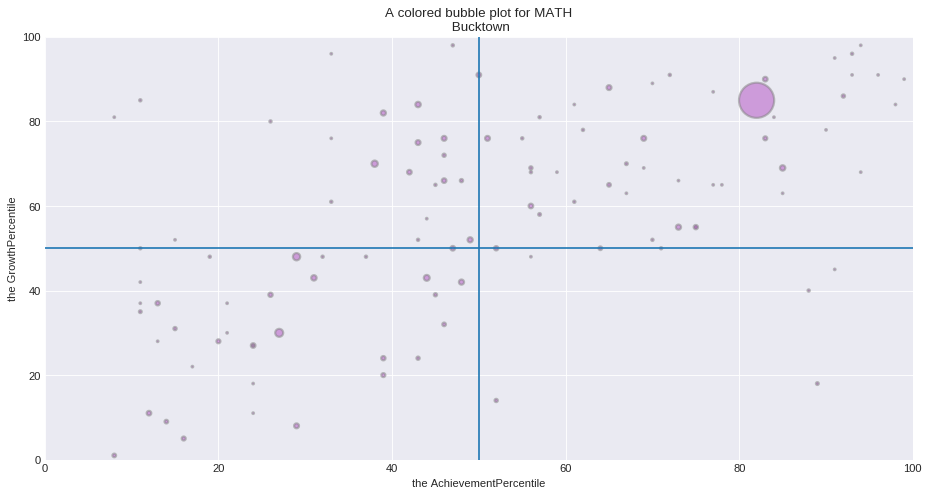

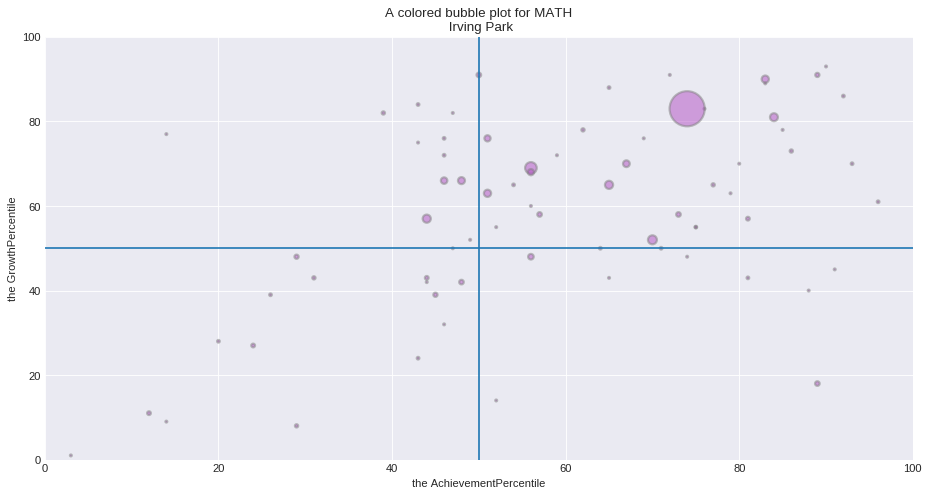

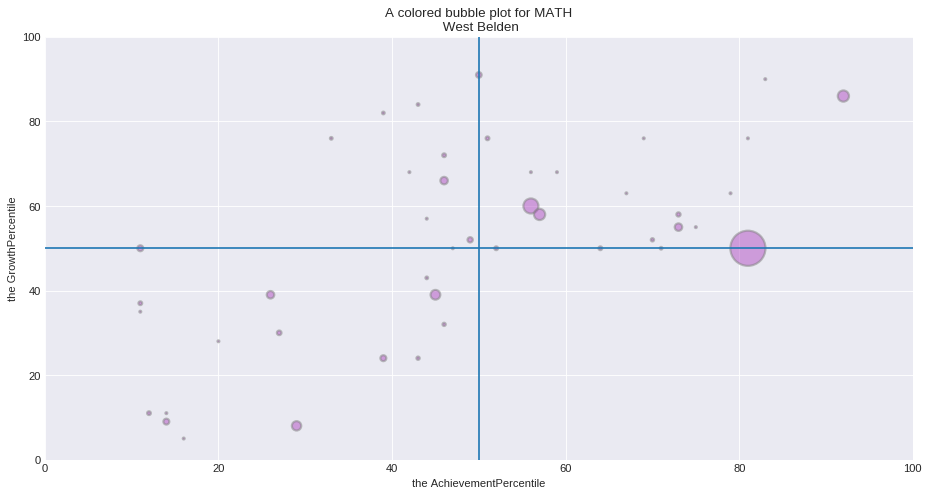

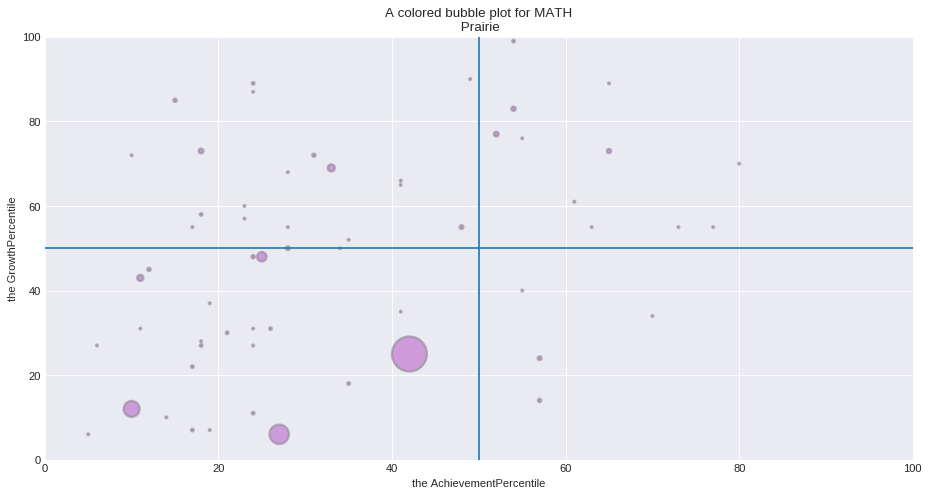

In [ ]:
plot_all(math)

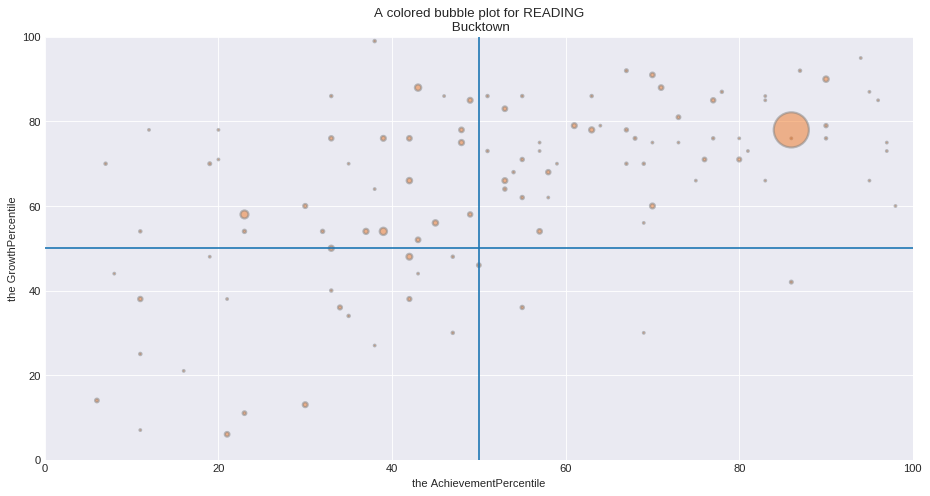

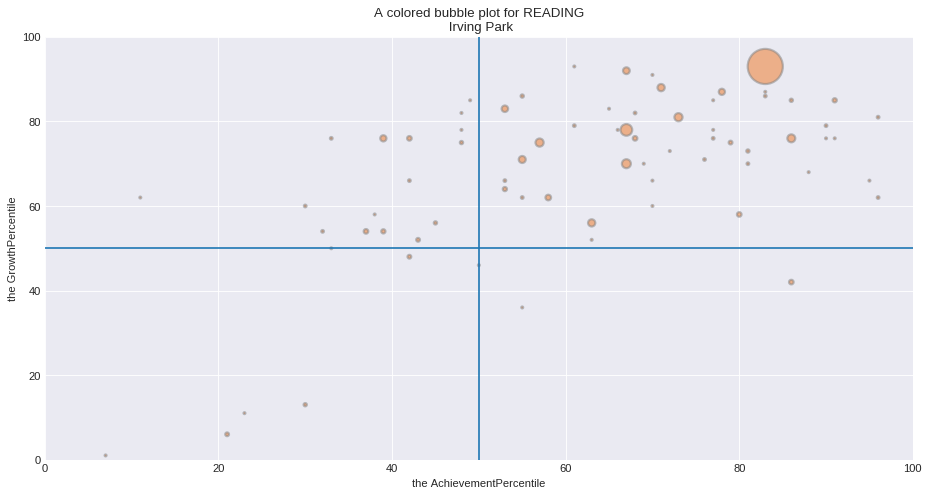

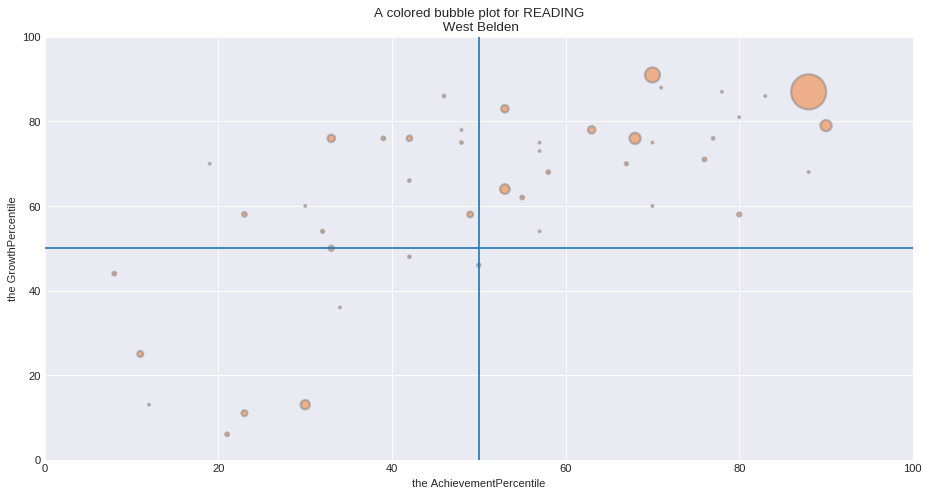

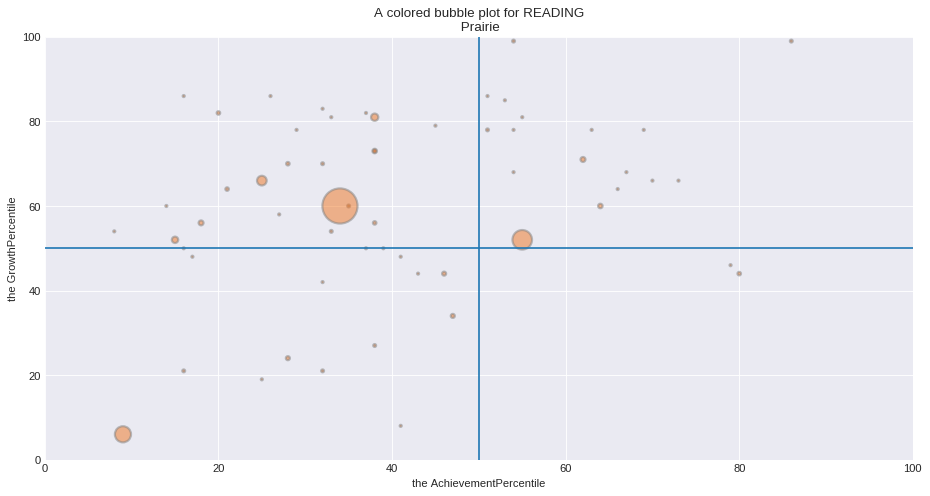

In [ ]:
plot_all(read)

In [ ]:
read.head()

,SchoolID,Campus,ZonedID,Weight,Subject,GrowthPercentile,AchievementPercentile
0,400025,Bucktown,609716,17.130621,READING,6.0,21.0
1,400027,Irving Park,609716,11.331445,READING,6.0,21.0
2,400030,West Belden,609716,11.299435,READING,6.0,21.0
6,400025,Bucktown,609789,27.837259,READING,48.0,42.0
7,400027,Irving Park,609789,11.331445,READING,48.0,42.0
